In [1]:
import cv2
flags=[i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

##  Video conversion from BGR to HSV

In [3]:
import numpy as np
import cv2
cap =cv2.VideoCapture(r'C:\Users\rahil\Desktop\Tensor Flow\videoplayback.mp4')
while(1):
    #Take each frame
    _, frame=cap.read()
    
    #Convert from BGR to HSV
    hsv=cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    #Define range of blue color in HSV
    lower_blue= np.array([110,50,50])
    upper_blue=np.array([130,255,255])
    green_low=np.array([50,110,50])
    green_high=np.array([255,130,255])
    red_low=np.array([50,50,110])
    red_high=np.array([255,255,130])
    
    #Threshold HSV image to get only Blue color
    mask1= cv2.inRange(hsv, lower_blue, upper_blue)
    mask2=cv2.inRange(hsv, red_low, red_high)
    mask3=cv2.inRange(hsv, green_low, green_high)
    #Bitwise - AND mask and original image
    res= cv2.bitwise_and(frame,frame,mask=mask1+mask2+mask3)
    
    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k==27:
        break;
cv2.destroyAllWindows()

#A new window is opened and three different videos run simultaneously


error: OpenCV(3.4.1) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:11214: error: (-215) (scn == 3 || scn == 4) && (depth == 0 || depth == 5) in function cv::cvtColor


## Image Thresholding

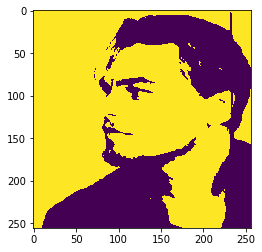

In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 = cv2.imread(r"C:\Users\rahil\Pictures\Saved Pictures\leo_side.jpg",0)
img1=cv2.resize(img1,(256,256))
ret,thresh1 = cv2.threshold(img1,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.imshow(thresh1)
plt.show()

## Adaptive Thresholding 

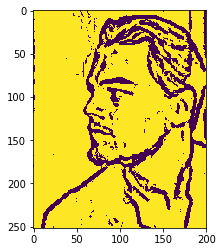

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread(r"C:\Users\rahil\Pictures\Saved Pictures\leo_side.jpg",0)
img =cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
                          cv2.THRESH_BINARY,11,2)
th3=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                          cv2.THRESH_BINARY,11,2)
plt.imshow(img)
plt.imshow(th1)
#plt.imshow(th2)
plt.imshow(th3)
plt.show()
#cv2.waitKey(0)
#cv2.destroyAllWindows()

## Otsu's Binarization 

In [ ]:
#Global thresholding
ret1, th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

#Otsu's Thresholding
ret2, th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

cv2.imshow('Global',th1)
cv2.imshow('Otsu',th2)
cv2.imshow('Gausian Blur and Otsu',th3)
cv2.waitKey(0)
cv2.destroyAllWindows()